https://datascience.stackexchange.com/questions/62303/difference-between-learning-curve-and-validation-curve

A learning curve plots the score over varying numbers of training samples, while a validation curve plots the score over a varying hyper parameter.

The learning curve is a tool for finding out if an estimator would benefit from more data, or if the model is too simple (biased).

In [0]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
print('hugu')

Let's import the dataset and have a glance overview of it:

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/5x12/ml4everyone/master/data/car_price.csv', delimiter=',', header=0)
df.head(2)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0


Let's define $X$ and $y$ variables for our model.

In [0]:
df_X = df[['enginesize', 'boreratio', 'stroke', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']]
df_y = df['price']

Let’s decide what training set sizes we want to use for generating the learning curves (also known as validation curves). The minimum value is 1. The maximum is given by the number of instances in the training set.

In [0]:
len(y)

205

Our training set has 205 instances, so the maximum value is 205. However, we haven’t yet put aside a validation set. We’ll do that using an 80:20 ratio, ending up with a training set of 164 instances (80%), and a validation set of 41 instances (20%). Given that our training set will have 164 instances, the maximum value we can use to generate our learning curves is 164. For our case, here, we use these six sizes:

In [0]:
train_sizes = [1, 32, 65, 97, 130, 164]

Now let's create a function learning_curve() to generate the data needed to plot a learning curve. The function returns a tuple containing three elements: the training set sizes, and the error scores on both the validation sets and the training sets. Inside the function, we use the following parameters:
estimator — indicates the learning algorithm we use to estimate the true model;
X — the data containing the features;
y — the data containing the target;
train_sizes — specifies the training set sizes to be used;
cv — determines the cross-validation splitting strategy (we’ll discuss this immediately);
scoring — indicates the error metric to use; the intention is to use the mean squared error (MSE) metric, but that’s not a possible parameter for scoring; we’ll use the nearest proxy, negative MSE, and we’ll just have to flip signs later on.

In [0]:
#learning curve
train_sizes, train_scores, validation_scores = learning_curve(estimator = LinearRegression(),
                                                              X = df_X,
                                                              y = df_y, 
                                                              train_sizes = train_sizes, 
                                                              cv = 5,
                                                              scoring = 'neg_mean_squared_error'
                                                             )

We create a learning_curve() to generate the data needed to plot a learning curve. The function returns a tuple containing three elements: the training set sizes, and the error scores on both the validation sets and the training sets. 

Inside the function, we use the following parameters:
- estimator — indicates the learning algorithm we use to estimate the true model;
- X — the data containing the features;
- y — the data containing the target;
- train_sizes — specifies the training set sizes to be used;
- cv — determines the cross-validation splitting strategy (we’ll discuss this immediately);
- scoring — indicates the error metric to use; the intention is to use the mean squared error (MSE) metric, but that’s not a possible parameter for scoring; we’ll use the nearest proxy, negative MSE, and we’ll just have to flip signs, as follows:

In [0]:
#flipping the signs

train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)

We already know what’s in train_sizes. Let’s inspect the other two variables to see what learning_curve() returned:

In [0]:
print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)

Training scores:

 [[       -0.                -0.                -0.
         -0.                -0.        ]
 [-11055848.58410226  -7128286.29681717  -7128286.29681717
   -7128286.29681717  -7128286.29681717]
 [-12045493.00505402 -13166448.90534141  -9793598.69446058
   -9793598.69446058  -9793598.69446058]
 [-12935105.79323151 -10866500.24920696 -12208383.41307802
  -12083451.54227036 -12083451.54227036]
 [-12552631.71936984 -10207194.80088571 -11999211.03302304
  -13580412.94329146 -13749152.54688732]
 [-12066511.69084682 -10595950.86039568 -12069288.31207311
  -12627044.43130113 -12253938.95415191]]

 ----------------------------------------------------------------------

Validation scores:

 [[-7.31268975e+07 -1.37937530e+08 -2.29883244e+07 -6.57270234e+07
  -1.82910260e+07]
 [-1.55635078e+07 -6.32417213e+07 -2.92354553e+07 -1.25905339e+07
  -2.93342258e+07]
 [-2.45926006e+07 -2.54512582e+07 -2.27271167e+07 -1.75490219e+07
  -2.51397152e+07]
 [-1.77626824e+07 -2.31313213e+07 -1.9

Since we specified six training set sizes, you might have expected six values for each kind of score. Instead, we got six rows for each, and every row has five error scores. This happens because learning_curve() runs a k-fold cross-validation under the hood, where the value of k is given by what we specify for the cv parameter. In our case, cv = 5, so there will be five splits. For each split, an estimator is trained for every training set size specified. Each column in the two arrays above designates a split, and each row corresponds to a test size.


To plot the learning curves, we need only a single error score per training set size, not 5. For this reason, in the next code cell we take the mean value of each row and also flip the signs of the error scores (as discussed above).

In [0]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 1     -0.000000e+00
32     7.913799e+06
65     1.091855e+07
97     1.203538e+07
130    1.241772e+07
164    1.192255e+07
dtype: float64

 --------------------

Mean validation scores

 1      6.361416e+07
32     2.999309e+07
65     2.309194e+07
97     1.912049e+07
130    1.846334e+07
164    1.749172e+07
dtype: float64


Now we have all the data we need to plot the learning curves. Before doing the plotting, however, we need to stop and make an important observation. You might have noticed that some error scores on the training sets are the same. For the row corresponding to training set size of 1, this is expected, but what about other rows? With the exception of the last row, we have a lot of identical values. For instance, take the second row where we have identical values from the second split onward. Why is that so? This is caused by not randomizing the training data for each split. Let’s walk through a single example with the aid of the diagram below. When the training size is 500 the first 500 instances in the training set are selected.

For the first split, these 500 instances will be taken from the second chunk. From the second split onward, these 500 instances will be taken from the first chunk. Because we don’t randomize the training set, the 500 instances used for training are the same for the second split onward. This explains the identical values from the second split onward for the 500 training instances case. An identical reasoning applies to the 100 instances case, and a similar reasoning applies to the other cases. 

In [0]:
![title](img/cv.png)

To stop this behavior, we need to set the shuffle parameter to True in the learning_curve() function. This will randomize the indices for the training data for each split:

In [0]:
train_sizes, train_scores, validation_scores = learning_curve(estimator = LinearRegression(),
                                                              X = df_X,
                                                              y = df_y, 
                                                              train_sizes = train_sizes, 
                                                              cv = 5,
                                                              shuffle=True, ### set shuffle to true
                                                              scoring = 'neg_mean_squared_error'
                                                             )

(-3180708.0126960706, 66794868.266617484)

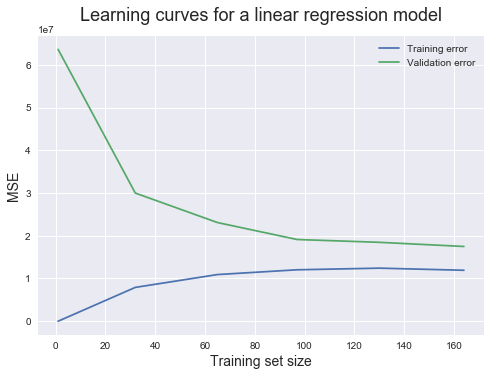

In [0]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim()

There’s a lot of information we can extract from this plot. Let’s proceed granularly. When the training set size is 1, we can see that the MSE for the training set is 0. This is normal behavior, since the model has no problem fitting perfectly a single data point. So when tested upon the same data point, the prediction is perfect. But when tested on the validation set (which has 1914 instances), the MSE rockets up to roughly 423.4. This relatively high value is the reason we restrict the y-axis range between 0 and 40. This enables us to read most MSE values with precision. Such a high value is expected, since it’s extremely unlikely that a model trained on a single data point can generalize accurately to 1914 new instances it hasn’t seen in training. When the training set size increases to 100, the training MSE increases sharply, while the validation MSE decreases likewise.

The linear regression model doesn’t predict all 100 training points perfectly, so the training MSE is greater than 0. However, the model performs much better now on the validation set because it’s estimated with more data. From 500 training data points onward, the validation MSE stays roughly the same. This tells us something extremely important: adding more training data points won’t lead to significantly better models. So instead of wasting time (and possibly money) with collecting more data, we need to try something else, like switching to an algorithm that can build more complex models. 
    
    
    https://www.dataquest.io/blog/learning-curves-machine-learning/

https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-and-visualizing-it-with-example-and-python-code-7af2681a10a7